# Introduction
In our project we are going to use a diamonds dataset which we scraped from the website- "James Allen" who's a big diaomnds and jewelry website in the US. 

About the Data attributes:


1. url: <br> the link for the diamond page.


2. carat: <br> The unit of measurement for the physical weight of diamonds. One carat equals 0.200 grams or 1/5 gram. (Numeric attribute)

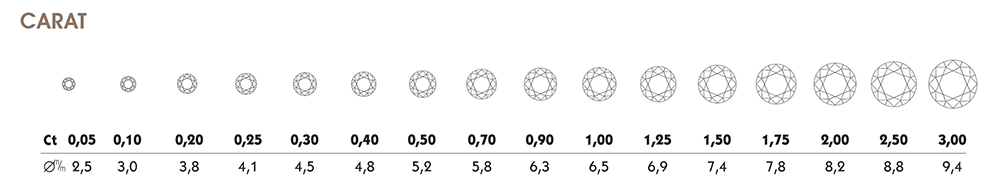

3. color: <br> Color is basically differentiated into white/clear diamonds. The color is represented by letters from D (Best) to Z (worst). note: in our data the lowest is M. (ordinal attribute)

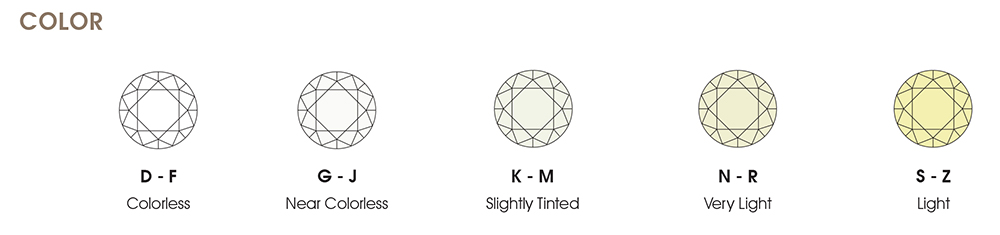

4. clarity: <br>represents how clean and without blemishes the diamond is. The clarity is represented by initials from FL (Best) to I3 (worst). note: in our data the lowest is I1. (ordinal attribute)

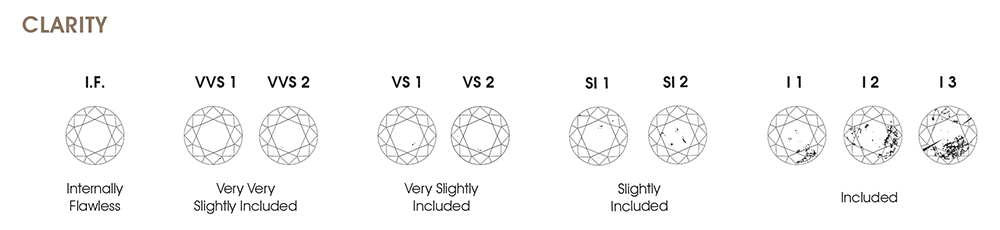

5. cut:<br>A diamond's cut refers to how well-proportioned the dimensions of a diamond are, and how these surfaces, or facets, are positioned to create sparkle and brilliance. The cut is scale is: Good, Very Good, Excellent, Ideal and True Hearts(the best). (ordinal attribute)

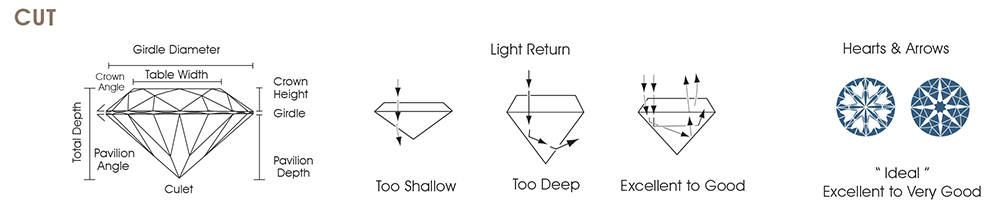

6. polish:<br> Polish is the quality, smoothness and condition of the facet surfaces. The polish is scale is: Good, Very Good, Excellent and Ideal(the best). (ordinal attribute)


7. shape: <br> the specific shape of the diamonds. the different shapes are: Round, Princess, Pear, Marquise, Emerald, Heart, Oval, Radiant, Cushion Modified, Asscher, Cushion, and Square Radiant. (categorical attribute)

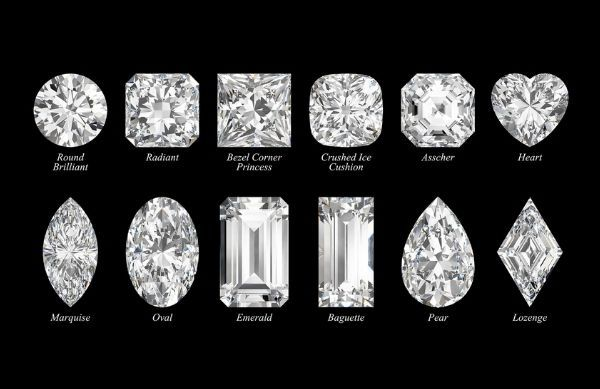

8. symmetry: <br> Symmetry is the exactness of the shape, overall outline, placement and alignment of the individual facets. The symmetry scale is: Good, Very Good, Excellent and Ideal(the best). (ordinal attribute)


9. fluorescence: <br> Fluorescence is the glow we sometimes see when an object emits visible light. Some diamonds fluoresce when they are exposed to ultraviolet (UV) rays from sources like the sun and fluorescent lamps. This can cause them to emit a bluish light or more rarely, a yellow or orangy light. The fluorescence scale is: Strong Blue/Strong, Medium Blue/Medium, Slight, Faint, Negligible and None(the best). (ordinal attribute)

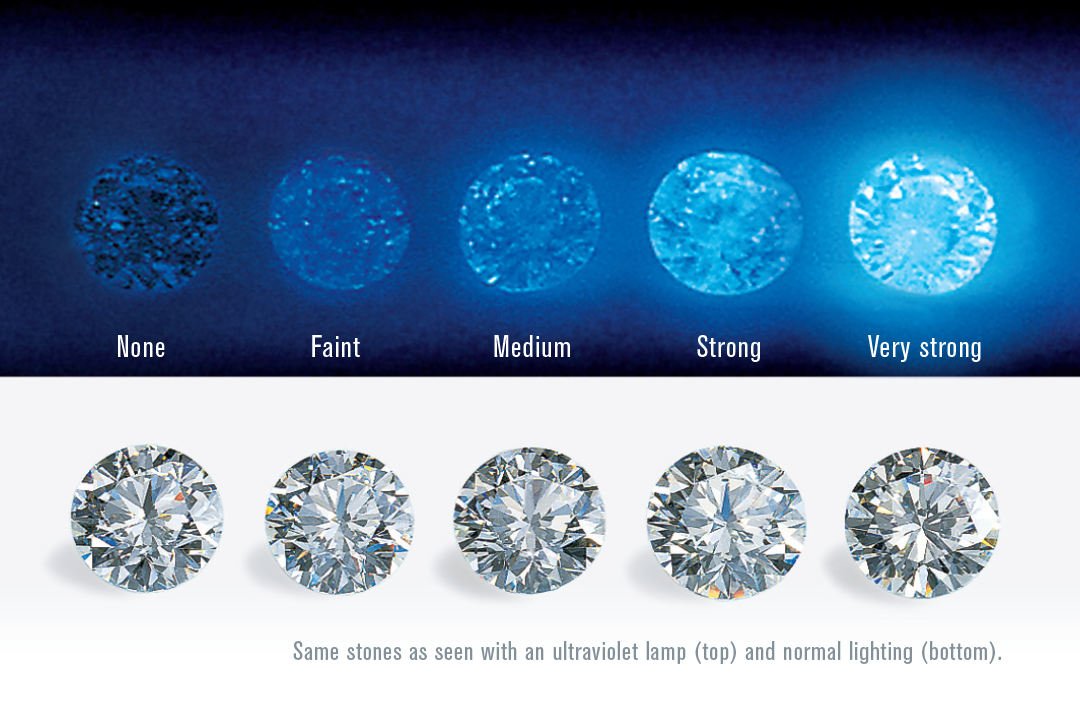

10. l: <br> Represents the length of the diamond.(numeric attribute)


11. w: <br> Represents the width of the diamond.(numeric attribute)


12. lw_ratio:<br> Represents the ratio between length and width. (numeric attribute)


13. certificate:<br> Represents the lab which checked the diamond and evaluate it. We checked with a specialist in the diamond bussiness and there are levels in the labs. so the certificate scale is: AGS, IGI and GIA (the best). (ordinal attribute)

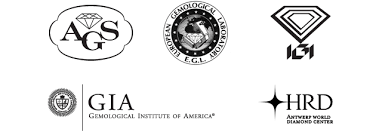

14. price: the price of the diamond.(our target)


# Goal 

### Our goal in this project is to build a model that best predicts a diamond's price by its attributes.

### Import the necessery libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline

### loading the data

In [2]:
df = pd.read_csv(r"C:\Users\Israel Gitler\Desktop\Diamonds-price-prediction-model\scraped_Diamonds", sep = ',')
df.head()

,url,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,lw,lw_ratio,certificate,price
0,https://www.jamesallen.com/loose-diamonds/roun...,0.31,L,SI2,Excellent,Excellent,Round,Excellent,None,4.34x4.37,1.01,GIA,$290
1,https://www.jamesallen.com/loose-diamonds/roun...,0.24,F,I1,Very Good,Very Good,Round,Very Good,None,3.92x3.93,1.00,GIA,$290
2,https://www.jamesallen.com/loose-diamonds/roun...,0.30,I,I1,Very Good,Very Good,Round,Very Good,None,4.27x4.23,1.01,GIA,$290
3,https://www.jamesallen.com/loose-diamonds/roun...,0.25,M,VS1,Excellent,Excellent,Round,Excellent,None,4.05x4.08,1.01,GIA,$290
4,https://www.jamesallen.com/loose-diamonds/prin...,0.31,J,VS1,Very Good,Excellent,Princess,Good,Medium,3.57x3.56,1.00,GIA,$290


## Preprocessing our data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           8334 non-null   object 
 1   carat         8232 non-null   float64
 2   color         8232 non-null   object 
 3   clarity       8232 non-null   object 
 4   cut           5242 non-null   object 
 5   polish        8232 non-null   object 
 6   shape         8232 non-null   object 
 7   symmetry      8232 non-null   object 
 8   fluorescence  8232 non-null   object 
 9   lw            8232 non-null   object 
 10  lw_ratio      8232 non-null   float64
 11  certificate   8232 non-null   object 
 12  price         8334 non-null   object 
dtypes: float64(2), object(11)
memory usage: 846.5+ KB


In [4]:
df.describe()

,carat,lw_ratio
count,8232.000000,8232.000000
mean,2.620633,1.155464
std,1.225793,0.224291
min,0.230000,1.000000
25%,1.730000,1.010000
50%,2.510000,1.010000
75%,3.210000,1.330000
max,7.630000,2.660000


checking and dealing with NaN in our data:

In [5]:
df.isna().sum()

url                0
carat            102
color            102
clarity          102
cut             3092
polish           102
shape            102
symmetry         102
fluorescence     102
lw               102
lw_ratio         102
certificate      102
price              0
dtype: int64

In [6]:
df[(df.carat.isna())]

,url,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,lw,lw_ratio,certificate,price
5526,https://www.jamesallen.com/loose-diamonds/pear...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$52,150"
5527,https://www.jamesallen.com/loose-diamonds/radi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$52,180"
5528,https://www.jamesallen.com/loose-diamonds/roun...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$52,200"
5529,https://www.jamesallen.com/loose-diamonds/pear...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$52,220"
5530,https://www.jamesallen.com/loose-diamonds/cush...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$52,220"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623,https://www.jamesallen.com/loose-diamonds/emer...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$53,130"
5624,https://www.jamesallen.com/loose-diamonds/oval...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$53,140"
5625,https://www.jamesallen.com/loose-diamonds/roun...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$53,500"
5626,https://www.jamesallen.com/loose-diamonds/emer...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$53,500"


There are 102 diamonds without any detail besides their prices. Because we have a lot of data, we can afford to drop them.

In [7]:
df = df.drop(df[(df.carat.isna())].index)
df

,url,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,lw,lw_ratio,certificate,price
0,https://www.jamesallen.com/loose-diamonds/roun...,0.31,L,SI2,Excellent,Excellent,Round,Excellent,None,4.34x4.37,1.01,GIA,$290
1,https://www.jamesallen.com/loose-diamonds/roun...,0.24,F,I1,Very Good,Very Good,Round,Very Good,None,3.92x3.93,1.00,GIA,$290
2,https://www.jamesallen.com/loose-diamonds/roun...,0.30,I,I1,Very Good,Very Good,Round,Very Good,None,4.27x4.23,1.01,GIA,$290
3,https://www.jamesallen.com/loose-diamonds/roun...,0.25,M,VS1,Excellent,Excellent,Round,Excellent,None,4.05x4.08,1.01,GIA,$290
4,https://www.jamesallen.com/loose-diamonds/prin...,0.31,J,VS1,Very Good,Excellent,Princess,Good,Medium,3.57x3.56,1.00,GIA,$290
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,https://www.jamesallen.com/loose-diamonds/oval...,5.02,J,VS1,NaN,Very Good,Oval,Very Good,None,13.72x9.43,1.45,GIA,"$77,590"
8330,https://www.jamesallen.com/loose-diamonds/emer...,3.50,F,VS1,NaN,Excellent,Emerald,Excellent,None,9.96x7.3,1.36,GIA,"$77,590"
8331,https://www.jamesallen.com/loose-diamonds/roun...,2.33,E,FL,Excellent,Excellent,Round,Excellent,None,8.47x8.5,1.00,GIA,"$77,600"
8332,https://www.jamesallen.com/loose-diamonds/radi...,5.01,I,VVS2,NaN,Excellent,Radiant,Excellent,None,10.16x8.68,1.17,IGI,"$77,670"


In [8]:
df.isna().sum()

url                0
carat              0
color              0
clarity            0
cut             2990
polish             0
shape              0
symmetry           0
fluorescence       0
lw                 0
lw_ratio           0
certificate        0
price              0
dtype: int64

We see that we still have NaN values in 'cut' attribute. lets deal with that:

checking the different cut values:

In [9]:
df['cut'].value_counts()

Excellent      3593
Very Good       878
Ideal           483
Good            261
True Hearts      27
Name: cut, dtype: int64

We can see that the 'Excellent' cut is the most frequnt cut. It is also the middle value in the cut rate.
so we are going to replace all the 'NaN' values of the cut attribute to 'Excellent'.

In [10]:
df.cut.fillna('Excellent', inplace=True)

In [11]:
df.isna().sum()

url             0
carat           0
color           0
clarity         0
cut             0
polish          0
shape           0
symmetry        0
fluorescence    0
lw              0
lw_ratio        0
certificate     0
price           0
dtype: int64

##### lets change our ordinal attribute values from labels to numbers:

first lets check the different values of each ordinal attribute:

In [12]:
ord_att=['color', 'clarity', 'cut', 'polish','symmetry', 'fluorescence', 'certificate']
for attribute in ord_att:
    print('The different values and amounts in the attribute:'+attribute)
    print(df[attribute].value_counts())

The different values and amounts in the attribute:color
D    1306
H    1233
G    1187
F    1138
I    1064
E    1049
J     736
K     457
L      43
M      19
Name: color, dtype: int64
The different values and amounts in the attribute:clarity
VS1     1576
SI1     1503
VS2     1500
SI2     1152
VVS2    1066
VVS1     861
IF       428
I1        74
FL        72
Name: clarity, dtype: int64
The different values and amounts in the attribute:cut
Excellent      6583
Very Good       878
Ideal           483
Good            261
True Hearts      27
Name: cut, dtype: int64
The different values and amounts in the attribute:polish
Excellent    7042
Very Good    1039
Good          106
Ideal          45
Name: polish, dtype: int64
The different values and amounts in the attribute:symmetry
Excellent    5634
Very Good    2109
Good          447
Ideal          42
Name: symmetry, dtype: int64
The different values and amounts in the attribute:fluorescence
None           4981
Faint          1573
Medium          85

We see that we have 13 or less different categories in each ordinal attribute. we will change them to numerical values according to their rate (from worst to best) that is shown in the information in the beginning.
The shape attribute is categorical and has no rate (there isn't a shape that is better than the others) so we will later use the get_dummies method to deal with it.

In [13]:
df['color'] = df['color'].map({'M':1, 'L':2, 'K':3, 'J':4, 'I':5, 'H':6, 'G':7, 'F':8, 'E':9, 'D':10})
df['clarity'] = df['clarity'].map({'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8, 'FL':9})
df['cut'] = df['cut'].map({'Good':1, 'Very Good':2, 'Excellent':3, 'Ideal':4, 'True Hearts':5})
df['polish'] = df['polish'].map({'Good':1, 'Very Good':2, 'Excellent':3, 'Ideal':4})
df['symmetry'] = df['symmetry'].map({'Good':1, 'Very Good':2, 'Excellent':3, 'Ideal':4})
df['fluorescence'] = df['fluorescence'].map({'Strong Blue':1, 'Strong':1, 'Medium Blue':2, 'Medium':2, 'Slight':3, 'Faint':4, 'Negligible':5, 'None':6})
df['certificate'] = df['certificate'].map({'AGS':1, 'IGI':2, 'GIA':3})

 We will drop the url column because it isn't necessary.

In [14]:
df=df.drop('url', axis=1)

Now we will change the price column to int. first we will check what are the different currencies that we have, then we will change them all to US dollar rate and round them to int values:

In [15]:
beginings = []
for price in df['price']:
    if ((price[0] > '9') or (price[0] < '0')) and price[0] not in beginings:
        beginings.append(price[0])
beginings

['$', 'A', '€', '£', 'C', 'H']

we recognize $,€,£. lets find the meaning of the currencies that start with A,C,H.

In [16]:
print((df[df['price'].str[0].isin(['A'])])['price'].head(1))
print((df[df['price'].str[0].isin(['C'])])['price'].head(1))
print((df[df['price'].str[0].isin(['H'])])['price'].head(1))

160    AU$2,349
Name: price, dtype: object
5261    CA$66,883
Name: price, dtype: object
7702    HK$677,379
Name: price, dtype: object


so we found that there are prices in AU\\$ - australian dollar, CA\\$ - canadian dollar, HK\\$ - Hong Kong dollar.

we want the entire price column to be in the same currency- USD(\\$). so we will convert now all the other currencies to US dollar. we will do it according to this rate:

€ = \$1.14

£ = \$1.36

AU\\$ = \$0.72

CA\\$ = \$0.79

HK\\$ = \$0.13

In [17]:
df['USD_price'] = 0
df.head()

,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,lw,lw_ratio,certificate,price,USD_price
0,0.31,2,2,3,3,Round,3,6,4.34x4.37,1.01,3,$290,0
1,0.24,8,1,2,2,Round,2,6,3.92x3.93,1.00,3,$290,0
2,0.30,5,1,2,2,Round,2,6,4.27x4.23,1.01,3,$290,0
3,0.25,1,5,3,3,Round,3,6,4.05x4.08,1.01,3,$290,0
4,0.31,4,5,2,3,Princess,1,2,3.57x3.56,1.00,3,$290,0


In [18]:
for index, row in df.iterrows():
    if row['price'][0] == '$':
        df.loc[index, ['USD_price']] = int(row['price'].lstrip('$').replace(',',''))
    elif row['price'][0] == '€':
        df.loc[index, ['USD_price']] = round(int(row['price'].lstrip('€').replace(',',''))*1.14)
    elif row['price'][0] == '£':
        df.loc[index, ['USD_price']] = round(int(row['price'].lstrip('£').replace(',',''))*1.36)
    elif row['price'][0] == 'A':
        df.loc[index, ['USD_price']] = round(int(row['price'].lstrip('AU$').replace(',',''))*0.72)
    elif row['price'][0] == 'C':
        df.loc[index, ['USD_price']] = round(int(row['price'].lstrip('CA$').replace(',',''))*0.79)
    elif row['price'][0] == 'H':
        df.loc[index, ['USD_price']] = round(int(row['price'].lstrip('HK$').replace(',',''))*0.13)
df.head()       

,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,lw,lw_ratio,certificate,price,USD_price
0,0.31,2,2,3,3,Round,3,6,4.34x4.37,1.01,3,$290,290
1,0.24,8,1,2,2,Round,2,6,3.92x3.93,1.00,3,$290,290
2,0.30,5,1,2,2,Round,2,6,4.27x4.23,1.01,3,$290,290
3,0.25,1,5,3,3,Round,3,6,4.05x4.08,1.01,3,$290,290
4,0.31,4,5,2,3,Princess,1,2,3.57x3.56,1.00,3,$290,290


Now we can drop the 'price' column-

In [19]:
df=df.drop('price', axis=1)
df.head()

,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,lw,lw_ratio,certificate,USD_price
0,0.31,2,2,3,3,Round,3,6,4.34x4.37,1.01,3,290
1,0.24,8,1,2,2,Round,2,6,3.92x3.93,1.00,3,290
2,0.30,5,1,2,2,Round,2,6,4.27x4.23,1.01,3,290
3,0.25,1,5,3,3,Round,3,6,4.05x4.08,1.01,3,290
4,0.31,4,5,2,3,Princess,1,2,3.57x3.56,1.00,3,290


Now we will divide the lw colume into 2 float columns. 

In [20]:
df['l'] = 0
df['w'] = 0

for index, row in df.iterrows():
    splitted = row['lw'].split('x')
    df.loc[index, ['l']] = float(splitted[0])
    df.loc[index, ['w']] = float(splitted[1])

df.head()

,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,lw,lw_ratio,certificate,USD_price,l,w
0,0.31,2,2,3,3,Round,3,6,4.34x4.37,1.01,3,290,4.34,4.37
1,0.24,8,1,2,2,Round,2,6,3.92x3.93,1.00,3,290,3.92,3.93
2,0.30,5,1,2,2,Round,2,6,4.27x4.23,1.01,3,290,4.27,4.23
3,0.25,1,5,3,3,Round,3,6,4.05x4.08,1.01,3,290,4.05,4.08
4,0.31,4,5,2,3,Princess,1,2,3.57x3.56,1.00,3,290,3.57,3.56


In [21]:
df=df.drop('lw', axis=1)
df.head()

,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,lw_ratio,certificate,USD_price,l,w
0,0.31,2,2,3,3,Round,3,6,1.01,3,290,4.34,4.37
1,0.24,8,1,2,2,Round,2,6,1.00,3,290,3.92,3.93
2,0.30,5,1,2,2,Round,2,6,1.01,3,290,4.27,4.23
3,0.25,1,5,3,3,Round,3,6,1.01,3,290,4.05,4.08
4,0.31,4,5,2,3,Princess,1,2,1.00,3,290,3.57,3.56


Rearranging the dataset columns

In [22]:
df = df[['carat', 'color', 'clarity', 'cut', 'polish', 'shape', 'symmetry', 'fluorescence', 'l', 'w', 'lw_ratio', 'certificate', 'USD_price']]
df.head()

,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,l,w,lw_ratio,certificate,USD_price
0,0.31,2,2,3,3,Round,3,6,4.34,4.37,1.01,3,290
1,0.24,8,1,2,2,Round,2,6,3.92,3.93,1.00,3,290
2,0.30,5,1,2,2,Round,2,6,4.27,4.23,1.01,3,290
3,0.25,1,5,3,3,Round,3,6,4.05,4.08,1.01,3,290
4,0.31,4,5,2,3,Princess,1,2,3.57,3.56,1.00,3,290


# Splitting the data to train-test sets

Before we can start analyzing our data, we will split it into test and train sets so we dont learn anything about our test set and get 'data leakage'.

In [23]:
# X data 
X = df.drop("USD_price", axis = 1)

In [24]:
# y data 
y = df["USD_price"]
y.head()

0    290
1    290
2    290
3    290
4    290
Name: USD_price, dtype: int64

In [25]:
x_train, x_test, y_train, y_test = train_test_split (X, y , test_size = 0.1, random_state = 12)
train_set=pd.concat((x_train,y_train),axis=1)
train_set

,carat,color,clarity,cut,polish,shape,symmetry,fluorescence,l,w,lw_ratio,certificate,USD_price
4888,3.01,8,2,3,3,Round,3,4,9.27,9.23,1.00,3,46520
3326,3.07,5,2,3,3,Round,3,6,9.28,9.35,1.01,2,29730
1878,2.00,7,2,3,3,Round,3,6,8.03,8.08,1.01,2,16660
5475,3.50,7,2,3,3,Round,3,2,9.61,9.69,1.01,3,52030
6191,3.00,7,5,3,3,Oval,2,4,10.97,8.28,1.32,3,57870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0.70,9,4,3,3,Emerald,3,6,5.58,4.24,1.32,3,2600
3714,1.90,10,5,3,3,Round,3,4,7.90,7.86,1.01,3,34930
7511,2.51,10,6,3,3,Round,3,6,8.85,8.82,1.00,3,78740
3325,1.50,9,6,3,3,Round,3,6,7.27,7.33,1.01,3,29730


In [26]:
len(x_test), len(x_train)

(824, 7408)

# Analyzing our data
### Familiarity with our data

Let's look at the distribution of the prices

array([[<AxesSubplot:title={'center':'USD_price'}>]], dtype=object)

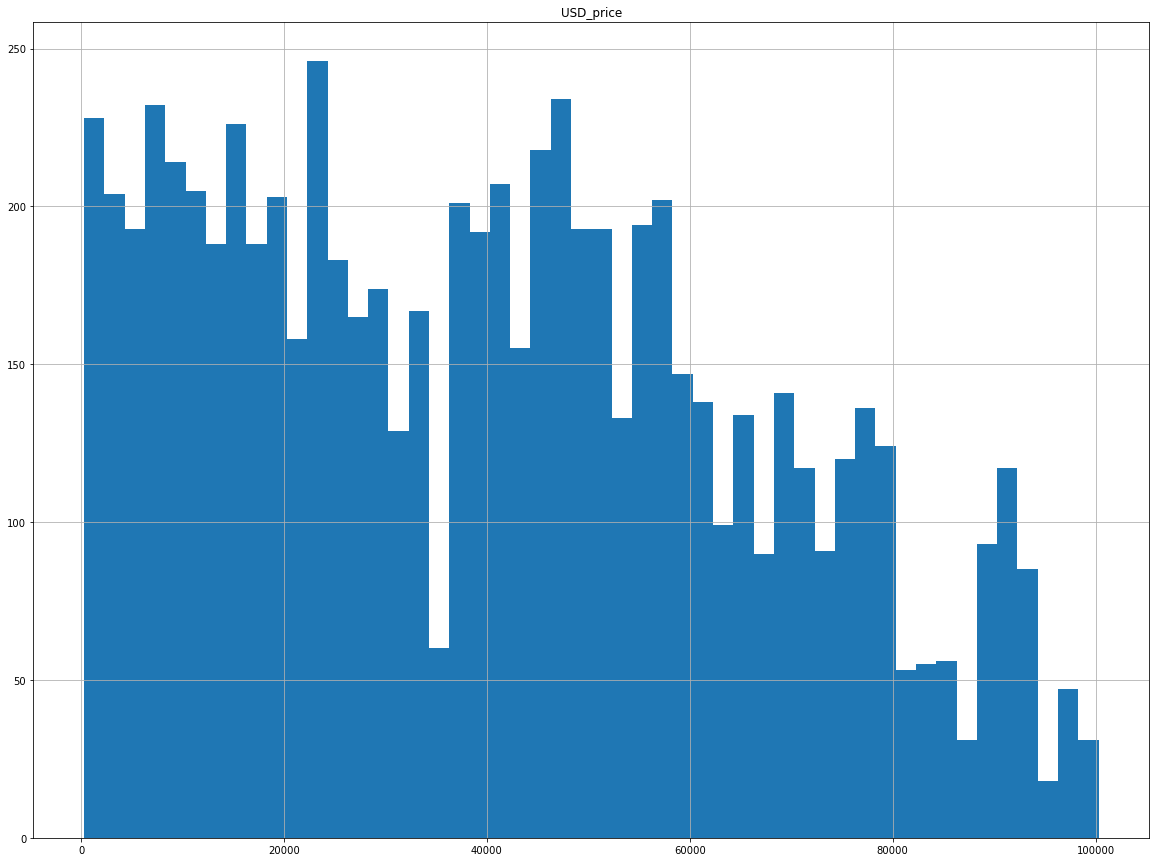

In [27]:
price_hist = train_set[['USD_price']].hist(bins=50, figsize=(20,15))
price_hist

We see that we have various prices with good distribution

#### Now, let's look at our numerical attributes:

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'l'}>],
       [<AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'lw_ratio'}>]], dtype=object)

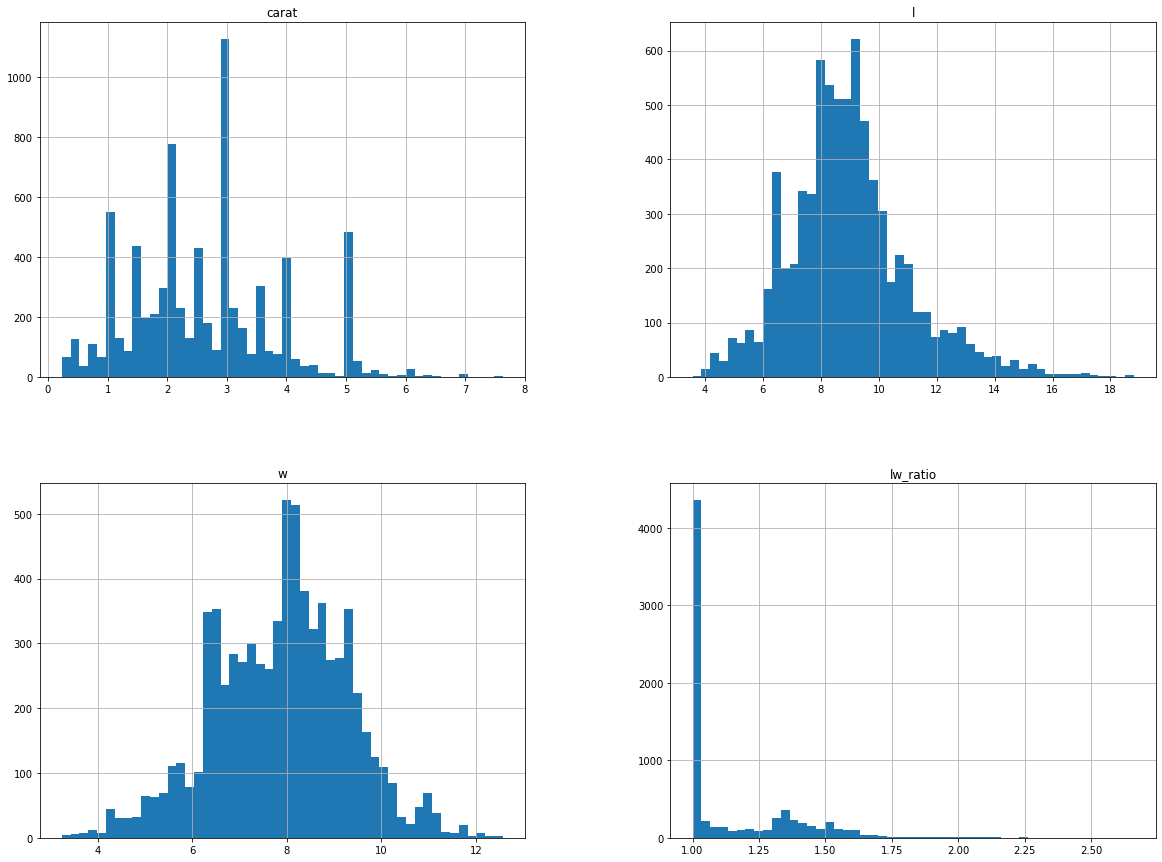

In [28]:
atttibutes_hist = train_set[['carat','l','w','lw_ratio']].hist(bins=50, figsize=(20,15))
atttibutes_hist

#### Let's look at our ordinal and caterogical attributes

Text(0.5, 1.0, 'Shape Distribution Pie Chart')

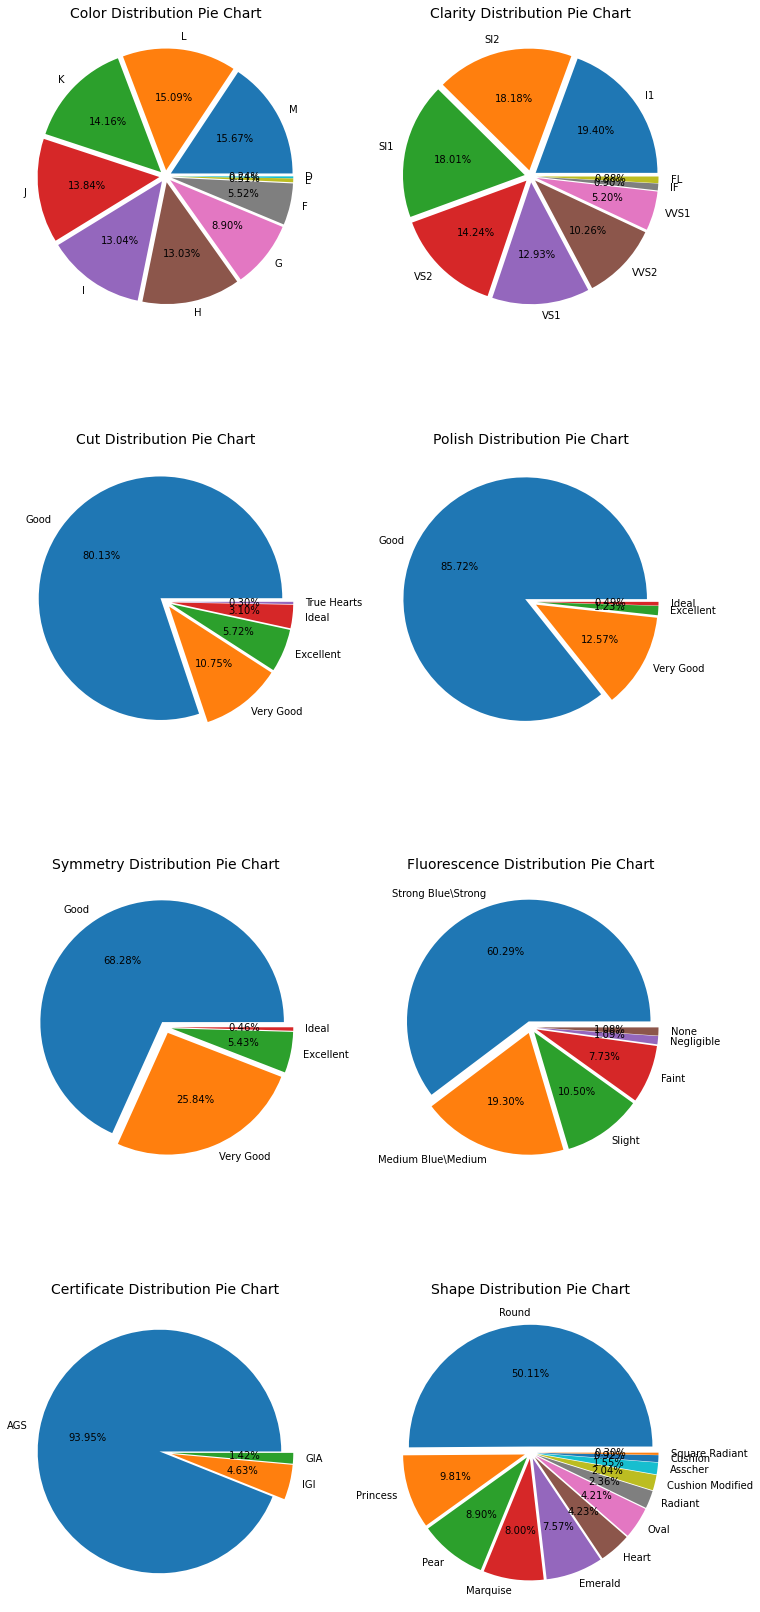

In [29]:
fig, ax = plt.subplots(4,2, figsize = (12,30))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = ['M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D']
values = train_set['color'].value_counts().tolist()[:len(labels)]
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", explode = [0.05 for i in labels])
ax1.set_title("Color Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF', 'FL']
values = train_set['clarity'].value_counts().tolist()[:len(labels)]
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", explode = [0.05 for i in labels])
ax2.set_title("Clarity Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ['Good', 'Very Good', 'Excellent', 'Ideal', 'True Hearts']
values = train_set['cut'].value_counts().tolist()[:len(labels)]
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", explode = [0.05 for i in labels])
ax3.set_title("Cut Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ['Good', 'Very Good', 'Excellent', 'Ideal']
values = train_set['polish'].value_counts().tolist()[:len(labels)]
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", explode = [0.05 for i in labels])
ax4.set_title("Polish Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ['Good', 'Very Good', 'Excellent', 'Ideal']
values = train_set['symmetry'].value_counts().tolist()[:len(labels)]
ax5.pie(x=values, labels=labels, autopct="%1.2f%%", explode = [0.05 for i in labels])
ax5.set_title("Symmetry Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ['Strong Blue\Strong', 'Medium Blue\Medium', 'Slight', 'Faint', 'Negligible', 'None']
values = train_set['fluorescence'].value_counts().tolist()[:len(labels)]
ax6.pie(x=values, labels=labels, autopct="%1.2f%%", explode = [0.05 for i in labels])
ax6.set_title("Fluorescence Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ['AGS', 'IGI', 'GIA']
values = train_set['certificate'].value_counts().tolist()[:len(labels)]
ax7.pie(x=values, labels=labels, autopct="%1.2f%%", explode = [0.05 for i in labels])
ax7.set_title("Certificate Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ['Round', 'Princess', 'Pear', 'Marquise', 'Emerald', 'Heart', 'Oval', 'Radiant', 'Cushion Modified', 'Asscher', 'Cushion','Square Radiant']
values = train_set['shape'].value_counts().tolist()[:len(labels)]
ax8.pie(x=values, labels=labels, autopct="%1.2f%%", explode = [0.05 for i in labels])
ax8.set_title("Shape Distribution Pie Chart", fontdict={'fontsize': 14})

We can see that in the attributes Cut, Polish, Symmetry and Shape the data is imbalanced towards one option. That may affect the corralations with the price but we decided not to change or add data giving that in the 'real world' that is usally the distribution.

The Certificate attribute is also imbalanced. for some reason the website we took the data from sells more of AGS diamonds than the other Certificates, but we decided to leave it like that because it's the vast majority of the data and to balance it we would need to do drastic changes and we dont think it is necessary

### now let's look for correlations between the different attributes and the diamond's price: 

#### lets look for correlations of the ordinal attributes


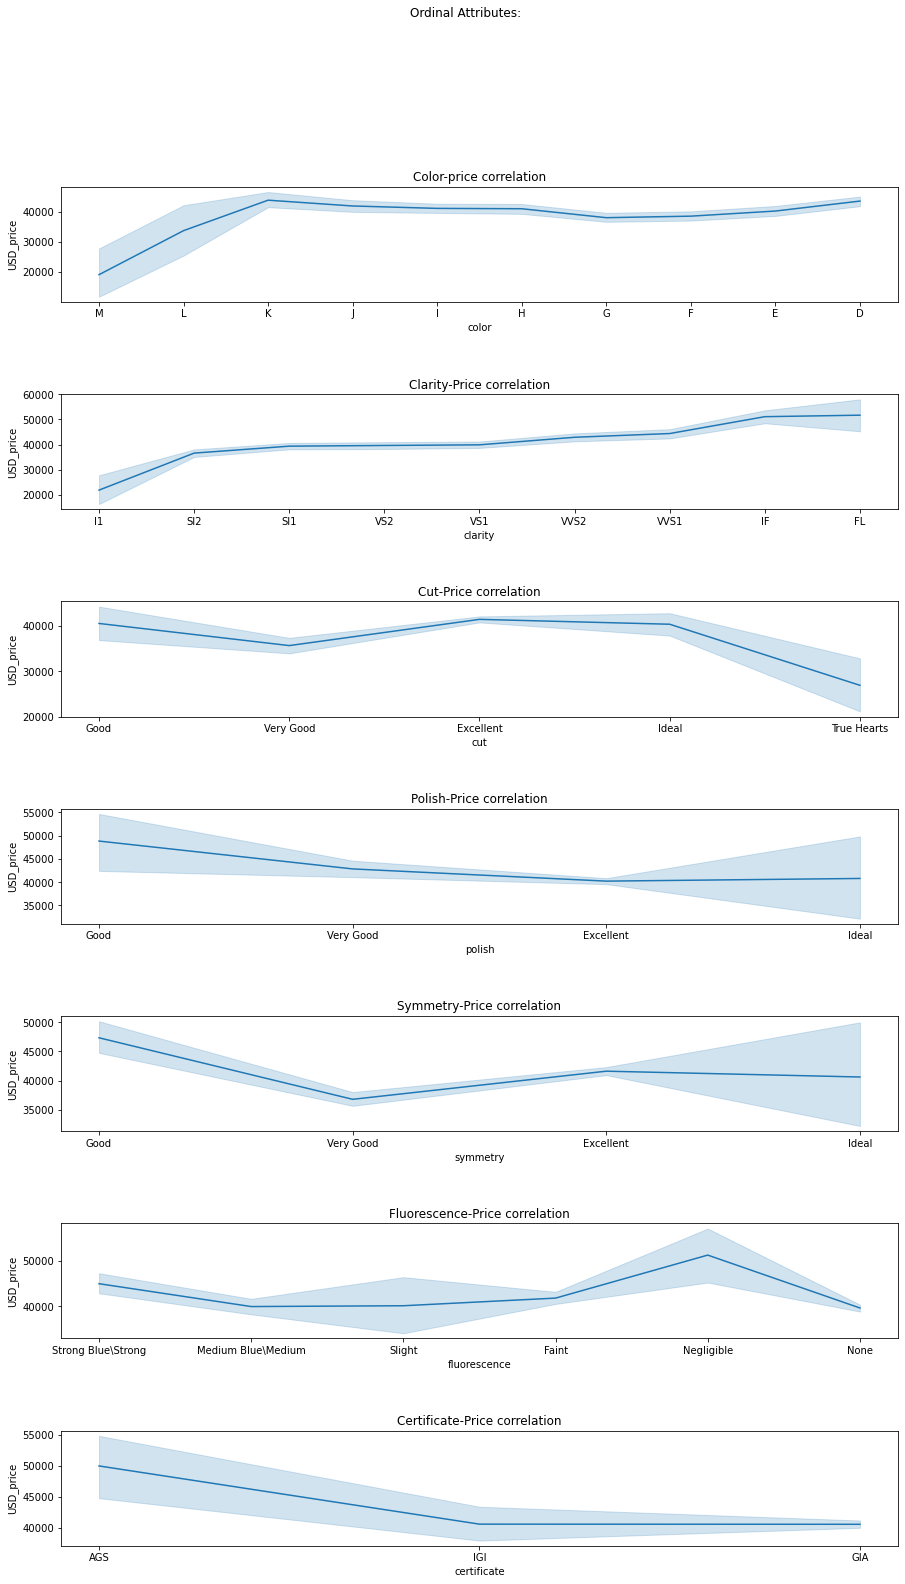

In [30]:
fig, ax = plt.subplots(7, 1, figsize=(15, 25))

(ax1,ax2,ax3,ax4,ax5,ax6,ax7)=ax
fig.suptitle('Ordinal Attributes:')


ax1.set_title("Color-price correlation")
color = sns.lineplot(ax=ax1, x='color', y="USD_price", data=train_set)
labels = ['M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D']
color.set_xticks([i for i in range(1,len(labels)+1)])
color.set_xticklabels(labels)

ax2.set_title("Clarity-Price correlation")
clarity = sns.lineplot(ax=ax2, x="clarity", y="USD_price", data=train_set)
labels =['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF', 'FL']
clarity.set_xticks([i for i in range(1,len(labels)+1)])
clarity.set_xticklabels(labels)

ax3.set_title("Cut-Price correlation")
cut = sns.lineplot(ax=ax3, x="cut", y="USD_price", data=train_set)
labels =['Good', 'Very Good', 'Excellent', 'Ideal', 'True Hearts']
cut.set_xticks([i for i in range(1,len(labels)+1)])
cut.set_xticklabels(labels)


ax4.set_title("Polish-Price correlation")
polish = sns.lineplot(ax=ax4, x="polish", y="USD_price", data=train_set)
labels=['Good', 'Very Good', 'Excellent', 'Ideal']
polish.set_xticks([i for i in range(1,len(labels)+1)])
polish.set_xticklabels(labels)

ax5.set_title("Symmetry-Price correlation")
symmetry = sns.lineplot(ax=ax5, x="symmetry", y="USD_price", data=train_set)
labels=['Good', 'Very Good', 'Excellent', 'Ideal']
symmetry.set_xticks([i for i in range(1,len(labels)+1)])
symmetry.set_xticklabels(labels)

ax6.set_title("Fluorescence-Price correlation")
fluorescence = sns.lineplot(ax=ax6, x="fluorescence", y="USD_price", data=train_set)
labels=['Strong Blue\Strong', 'Medium Blue\Medium', 'Slight', 'Faint', 'Negligible', 'None']
fluorescence.set_xticks([i for i in range(1,len(labels)+1)])
fluorescence.set_xticklabels(labels)

ax7.set_title("Certificate-Price correlation")
certificate = sns.lineplot(ax=ax7, x="certificate", y="USD_price", data=train_set)
labels=['AGS', 'IGI', 'GIA']
certificate.set_xticks([i for i in range(1,len(labels)+1)])
certificate.set_xticklabels(labels)

plt.subplots_adjust(hspace=0.8)

### Assumptions:

1.From the second plot(Clarity) we assume that there is a positive correlation between the clarity and the diamond's price. 

2.From the last plot(Certificate) we assume that there is a negative correlation between the certificate and the diamond's price, Although because there is a large std it might not be true. In addition, as we saw the distribution of the Certificate attribute is very imbalanced towards AGS so there might not be an actual correlation.

3.In the other plots it is hard to see a good correlation. 

#### lets look for correlations of the numerical attributes:

Text(0.5, 1.0, 'Length-Width ratio-Price correlation')

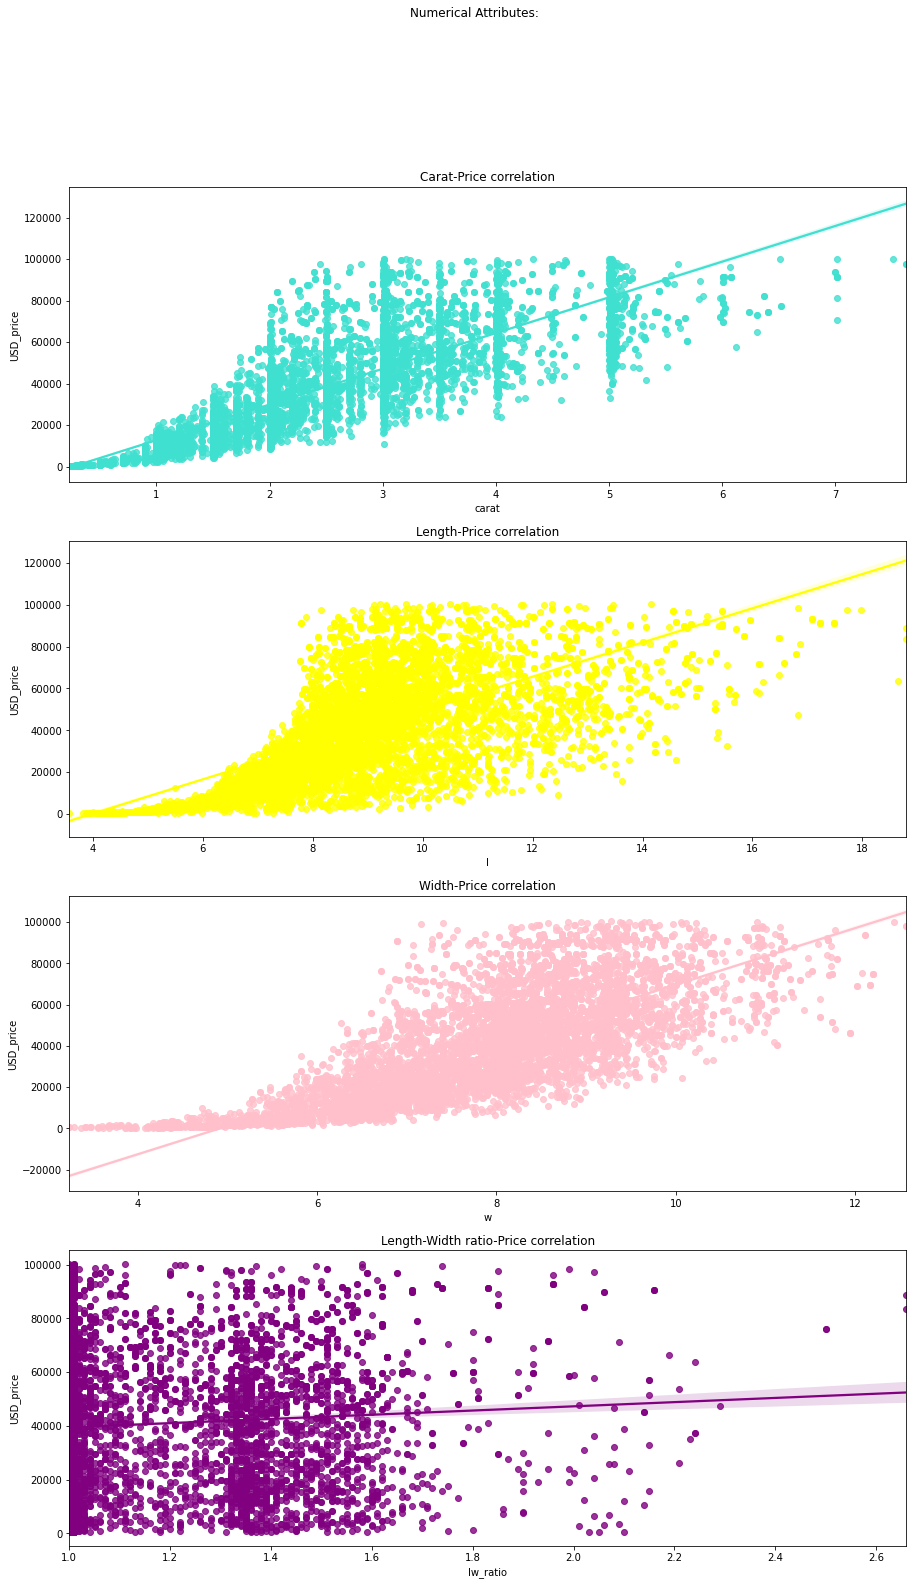

In [31]:
fig, ax = plt.subplots(4, 1, figsize=(15, 25))

(ax1,ax2,ax3,ax4)=ax
fig.suptitle('Numerical Attributes:')

sns.regplot(ax=ax1, data=train_set, x="carat", y="USD_price",color="Turquoise")
ax1.set_title("Carat-Price correlation")

sns.regplot(ax=ax2, data=train_set, x="l", y="USD_price",color="Yellow")
ax2.set_title("Length-Price correlation")

sns.regplot(ax=ax3, data=train_set, x="w", y="USD_price",color="Pink")
ax3.set_title("Width-Price correlation")

sns.regplot(ax=ax4, data=train_set, x="lw_ratio", y="USD_price",color="Purple")
ax4.set_title("Length-Width ratio-Price correlation")

### Conclusions:

1.From the first three plots(Carat, Length and Width) we can clearly see that there is a strong positive corralation between them and the diamond's price. (which is not a surprise to us because they are all connected to the diamond's size and logically the bigger the diamond is, the more expensive it is)

2.From the last plot(lengh-width ratio) we can see that there is no correlation between the lengh-width ratio and the diamond's price.

#### now, let's look at the categorical attribute-'Shape' and look for a corralation to the diamond's price:


<AxesSubplot:xlabel='shape', ylabel='USD_price'>

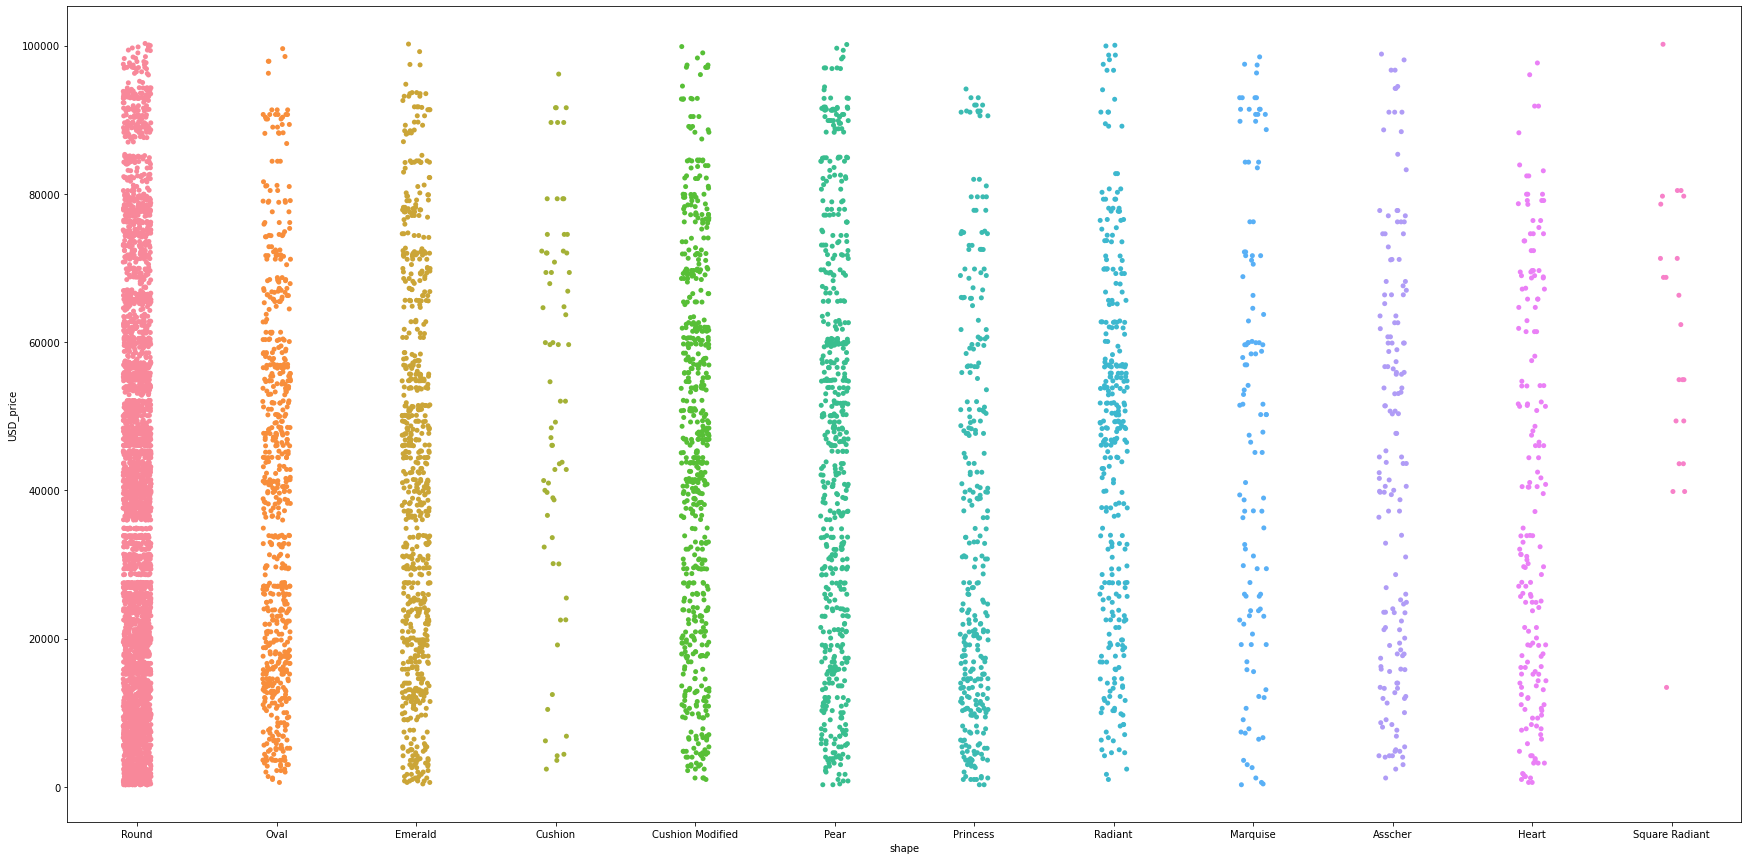

In [32]:
plt.figure(figsize = (30,15))
#title('Shapes')
sns.stripplot(x="shape", y="USD_price", data=train_set)

### Conclusion:
there is no correlation between the shape of the diamond and its price. each shape has diamonds on the whole price range.
we can also see that the vast majority of the diamonds are round (as we would suspect - usually the diamonds we see are round..) 

## After looking at all the correlation plots above, we can conclude that there is probably a correlation between the price to the Clarity, Carat, Length, Width and maybe the Certificate. 

now we will use the get_dummies method on the only categorical attribute- shape.

# get dummies for shape column

In [33]:
x_train= pd.get_dummies(x_train, columns=['shape'])
#We have to change the test data so the tarin and test data have the same columns
x_test= pd.get_dummies(x_test, columns=['shape'])
train_set=pd.concat((x_train,y_train),axis=1)
train_set.head()

,carat,color,clarity,cut,polish,symmetry,fluorescence,l,w,lw_ratio,...,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Radiant,shape_Round,shape_Square Radiant,USD_price
4888,3.01,8,2,3,3,3,4,9.27,9.23,1.00,...,0,0,0,0,0,0,0,1,0,46520
3326,3.07,5,2,3,3,3,6,9.28,9.35,1.01,...,0,0,0,0,0,0,0,1,0,29730
1878,2.00,7,2,3,3,3,6,8.03,8.08,1.01,...,0,0,0,0,0,0,0,1,0,16660
5475,3.50,7,2,3,3,3,2,9.61,9.69,1.01,...,0,0,0,0,0,0,0,1,0,52030
6191,3.00,7,5,3,3,2,4,10.97,8.28,1.32,...,0,0,0,1,0,0,0,0,0,57870


### Now let's take a look at the heatmap and corralation metrix of our data:

<AxesSubplot:>

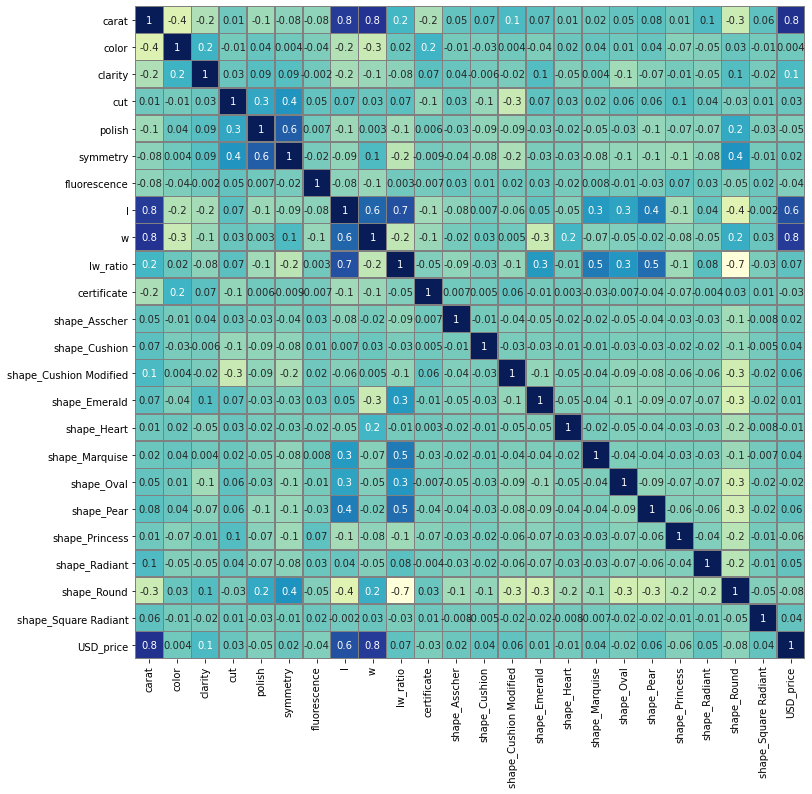

In [34]:
plt.figure(figsize = (12,12))
sns.heatmap(train_set.corr(), annot=True, fmt='.1g', cbar=False, linewidths=0.5, linecolor='grey', cmap="YlGnBu")

In [35]:
corr_matrix = train_set.corr()
corr_matrix["USD_price"].sort_values(ascending = False)

USD_price                 1.000000
carat                     0.815153
w                         0.754079
l                         0.649513
clarity                   0.130711
lw_ratio                  0.067627
shape_Pear                0.060450
shape_Cushion Modified    0.058581
shape_Radiant             0.046339
shape_Square Radiant      0.043671
shape_Cushion             0.043270
shape_Marquise            0.037067
cut                       0.032124
symmetry                  0.018213
shape_Asscher             0.017081
shape_Emerald             0.011853
color                     0.004242
shape_Heart              -0.009587
shape_Oval               -0.020623
certificate              -0.031971
fluorescence             -0.043115
polish                   -0.045867
shape_Princess           -0.055686
shape_Round              -0.079388
Name: USD_price, dtype: float64

### As we can see, our assumptions from the plots above were mostly true. The highest correlations with the price are indeed the attributes Carat, Length, Width and Clarity.
### We  can also see that we have a very low negative correlation with the Certificate, Polish and fluorescence. we don't think that it means somthing because as we said before, the data is imbalanced in those attributes.            

#### Let's take a closer look at those correlations:

<AxesSubplot:>

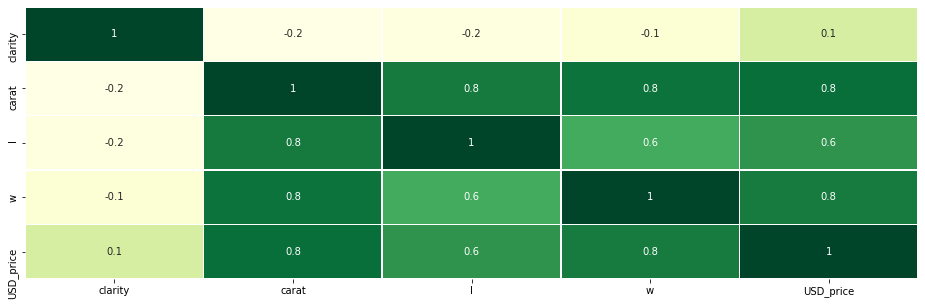

In [36]:
plt.figure(figsize = (16,5))
#sns.color_palette("viridis", as_cmap=True)
sns.heatmap(train_set[['clarity', 'carat', 'l', 'w', 'USD_price']].corr(), annot=True, fmt='.1g', cbar=False, linewidths=0.5, linecolor='white', cmap='YlGn')

Another observation we see from this heatmap is that there are strong correlations between Length, Width and Carat which make sense because they are all about the size of the diamond.

# Scaling the Data:

We are going to scale the numeric and ordinal attributes with a Standardization method. We are not going to do that to the 'Shape' attribute because it's a categorical attribute and we used the 'get_dummies' method to deal with it (which converted it to a 0-1).

Our data is pretty much all on the same scale so we don't expect to see much difference between the standardized and original model scores.

#### Standartized the data using StandardScaler:

In [37]:
st_scaler = StandardScaler()
x_train_stand = x_train.copy()
x_test_stand = x_test.copy()

columns = ['carat', 'color', 'clarity', 'cut', 'polish', 'symmetry',
       'fluorescence', 'l', 'w', 'lw_ratio', 'certificate']

x_train_stand[columns] = st_scaler.fit_transform(x_train_stand[columns])
x_test_stand[columns] = st_scaler.transform(x_test_stand[columns])
x_train_stand

,carat,color,clarity,cut,polish,symmetry,fluorescence,l,w,lw_ratio,...,shape_Cushion Modified,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Radiant,shape_Round,shape_Square Radiant
4888,0.314924,0.496911,-1.397758,0.197718,0.365135,0.613512,-0.443478,0.156023,0.939570,-0.698390,...,0,0,0,0,0,0,0,0,1,0
3326,0.363665,-0.896219,-1.397758,0.197718,0.365135,0.613512,0.717810,0.160864,1.023565,-0.653854,...,0,0,0,0,0,0,0,0,1,0
1878,-0.505547,0.032534,-1.397758,0.197718,0.365135,0.613512,0.717810,-0.444311,0.134617,-0.653854,...,0,0,0,0,0,0,0,0,1,0
5475,0.712974,0.032534,-1.397758,0.197718,0.365135,0.613512,-1.604765,0.320630,1.261551,-0.653854,...,0,0,0,0,0,0,0,0,1,0
6191,0.306800,0.032534,0.265897,0.197718,0.365135,-1.079817,-0.443478,0.979060,0.274609,0.726766,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,-1.561599,0.961287,-0.288654,0.197718,0.365135,0.613512,0.717810,-1.630453,-2.553224,0.726766,...,0,1,0,0,0,0,0,0,0,0
3714,-0.586782,1.425664,0.265897,0.197718,0.365135,0.613512,-0.443478,-0.507249,-0.019374,-0.653854,...,0,0,0,0,0,0,0,0,1,0
7511,-0.091250,1.425664,0.820449,0.197718,0.365135,0.613512,0.717810,-0.047316,0.652587,-0.698390,...,0,0,0,0,0,0,0,0,1,0
3325,-0.911721,0.961287,0.820449,0.197718,0.365135,0.613512,0.717810,-0.812257,-0.390352,-0.653854,...,0,0,0,0,0,0,0,0,1,0


### Now that we finished to preprocess the data, we can start to look for the best model to predict a diamond's price.

# Model Evaluation Techniques:

We will look at 3 evaluation techniques for our model: R2, Root Mean Squared Error and Mean Absolute Error.

A short explaination about each one of them:

**R2:** The proportion of variation in the outcome that is explained by the predictor variables. In multiple regression models, R2 corresponds to the squared correlation between the observed outcome values and the predicted values by the model. The Higher the R-squared, the better the model.

**Root Mean Squared Error:** A simple square root of mean squared error, which represents the squared distance between actual and predicted values. we perform squared to avoid the cancellation of negative terms and it is the benefit of MSE.

**Mean Absolute Error:** The absolute difference between actual and predicted values. so, we sum all the errors and divide them by a total number of observations. And we aim to get a minimum MAE for our model

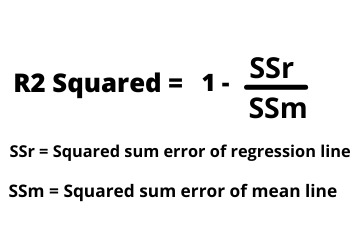

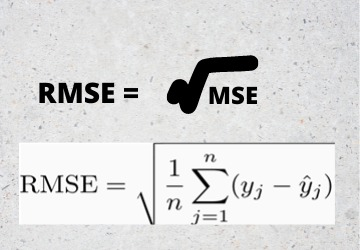

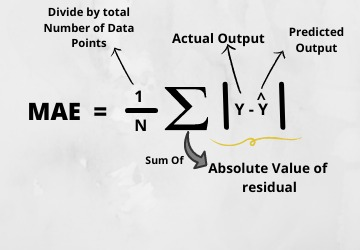

# Models

## Dummy Model

first let's look at a dummy model (which predicts using the mean of the prices) and it's performance 

In [38]:
dummy= DummyRegressor()

dummy.fit(x_train,y_train)
y_pred = dummy.predict(x_test)
R2_score = dummy.score(x_test, y_test)
mae_score = MAE(y_test, y_pred)
mse_score = MSE(y_test, y_pred)

print('R2 Score of the dummy model is: ' + str(R2_score))
print('Mean Absolute Error Score of the dummy model is: ' + str(mae_score))
print('Mean Squared Error Score of the dummy model is: ' + str(mse_score))

R2 Score of the dummy model is: -3.337600282060649e-05
Mean Absolute Error Score of the dummy model is: 21683.132842151757
Mean Squared Error Score of the dummy model is: 661552325.2243732


# Linear Regression Model

Let's look at the performance of Linear regression model on the unscaled and standardized data:

Unscaled data:

In [39]:
linreg = LinearRegression()

rmse_score = np.mean(np.sqrt(-cross_val_score(linreg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)))
r2_score = np.mean(np.sqrt(cross_val_score(linreg, x_train, y_train, cv=10)))
mae_score = np.mean(-cross_val_score(linreg, x_train, y_train, scoring='neg_mean_absolute_error', cv=10))

print('Scores for best Linear Regression model:')
print('R2: ' + str(r2_score))
print('MAE: ' + str(mae_score))
print('RMSE: ' + str(rmse_score))

Scores for best Linear Regression model:
R2: 0.9318721892893391
MAE: 7137.45059410056
RMSE: 9410.30769102155


standardized data:

In [40]:
linreg_stand = LinearRegression()

stand_rmse_score = np.mean(np.sqrt(-cross_val_score(linreg_stand, x_train_stand, y_train, scoring='neg_mean_squared_error', cv=10)))
stand_r2_score = np.mean(np.sqrt(cross_val_score(linreg_stand, x_train_stand, y_train, cv=10)))
stand_mae_score = np.mean(-cross_val_score(linreg_stand, x_train_stand, y_train, scoring='neg_mean_absolute_error', cv=10))

print('Scores for best Linear Regression model with standartized data:')
print('R2: ' + str(stand_r2_score))
print('MAE: ' + str(stand_mae_score))
print('RMSE: ' + str(stand_rmse_score))

Scores for best Linear Regression model with standartized data:
R2: 0.9318721892893391
MAE: 7137.450594100563
RMSE: 9410.307691021551


we can see that the scores of the original and standardized datas are almost the same (as we suspected) so from now on we will only use the original unscaled data.

let's try to see what happens if we only use the high-correlated attributes for training our Linear Regression model:

In [41]:
linreg_best_feat = LinearRegression()

rmse_score = np.mean(np.sqrt(-cross_val_score(linreg_best_feat, x_train[['carat', 'clarity','l', 'w']], y_train, scoring='neg_mean_squared_error', cv=10)))
r2_score = np.mean(np.sqrt(cross_val_score(linreg_best_feat, x_train[['carat', 'clarity','l', 'w']], y_train, cv=10)))
mae_score = np.mean(-cross_val_score(linreg_best_feat, x_train[['carat', 'clarity','l', 'w']], y_train, scoring='neg_mean_absolute_error', cv=10))

print('Scores for best Linear Regression model with high-corralated attributes:')
print('R2: ' + str(r2_score))
print('MAE: ' + str(mae_score))
print('RMSE: ' + str(rmse_score))

Scores for best Linear Regression model with high-corralated attributes:
R2: 0.8798925616081377
MAE: 9331.532652277016
RMSE: 12325.44333046805


We can see that although we took the best correlated attributes we got worse results. so we need to stay with the whole data.

# Random Forest Regressor

We will use GridSearchCV to find the best hyperparameters for this model:

For 'n_estimators'- we will check different random options for the number of trees in the forest.

For 'max_features'-we will check 2 different options for the number of features to consider when looking for the best split: sqrt- is max_features=sqrt(n_features), and log2 is max_features=log2(n_features).

For 'max_depth'- we will check different random options for the depth of trees in the forest.

In [42]:
rfr=RandomForestRegressor(random_state=42)
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [5, 10, 15, 20]
}
rfr_grid = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 10, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], refit='neg_mean_absolute_error')

In [43]:
rfr_grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             refit='neg_mean_absolute_error',
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                      'r2'])

In [44]:
print(rfr_grid.best_params_)
print(rfr_grid.best_index_)

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 500}
34


Best hyperparamters model scores:

In [45]:
print('Scores for best Random forest model:')
print('R2: ' + str(rfr_grid.cv_results_['mean_test_r2'][34]))
print('MAE: ' + (str(-rfr_grid.best_score_)))
print('RMSE: ' + str(np.sqrt(-rfr_grid.cv_results_['mean_test_neg_mean_squared_error'][34])))

Scores for best Random forest model:
R2: 0.9658324358755417
MAE: 3016.515207025046
RMSE: 4798.223407347971


Wow, the scores are much better than the linear regression model scores. 

We see that the best model used the highest hyperparameters that we gave it.
let's try to run it again with higher options:

In [46]:
param_grid = { 
    'n_estimators': [500, 700, 900],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [20,50,70,100]
}
rfr_grid = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 10, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], refit='neg_mean_absolute_error')

rfr_grid.fit(x_train, y_train)

print(rfr_grid.best_index_)
print(rfr_grid.best_params_)

7
{'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 700}


In [47]:
print('Scores for best Random forest model:')
print('R2: ' + str(rfr_grid.cv_results_['mean_test_r2'][7]))
print('MAE: ' + (str(-rfr_grid.best_score_)))
print('RMSE: ' + str(np.sqrt(-rfr_grid.cv_results_['mean_test_neg_mean_squared_error'][7])))

Scores for best Random forest model:
R2: 0.9672598827963454
MAE: 2910.021977156169
RMSE: 4696.992706949291


let's try to see what happens if we only use the high-correlated attributes for training our forest model:

In [48]:
rfr_best_feat=RandomForestRegressor(random_state=42)

rfr_best_feat_grid = GridSearchCV(estimator=rfr_best_feat, param_grid=param_grid, cv= 10, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], refit='neg_mean_absolute_error')

rfr_best_feat_grid.fit(x_train[['carat', 'clarity','l', 'w']], y_train)

print(rfr_best_feat_grid.best_index_)
print(rfr_best_feat_grid.best_params_)

7
{'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 700}


In [49]:
print('Scores for best Random forest model with high-corralated attributes:')

print('R2: ' + str(rfr_best_feat_grid.cv_results_['mean_test_r2'][7]))
print('MAE: ' + (str(-rfr_best_feat_grid.best_score_)))
print('RMSE: ' + str(np.sqrt(-rfr_best_feat_grid.cv_results_['mean_test_neg_mean_squared_error'][7])))

Scores for best Random forest model with high-corralated attributes:
R2: 0.8928928359759046
MAE: 5216.435878074686
RMSE: 8491.260909620243


We can see that although we took the best correlated attributes we got worse results. so we need to stay with the whole data.

# KNN Regressor Model

Lets look for the best hyperparameters for the knn model. 
We will use GridSearchCV to find them:

For the k value for number of nearest neighbors we have a range from 1-30.

For the weights options we have 'uniform'- that gives each neighbor the same weight, or 'distance'- that gives the closer neighbors more weight.

For the metric options we have 'euclidean' or 'manhattan' that calculate differently the distance.

In [50]:
knn = KNeighborsRegressor()

In [51]:
k_range = list(range(1,31))
weight_options = ['uniform', 'distance']
metrics_options = ['euclidean', 'manhattan']

In [52]:
param_grid = dict(n_neighbors=k_range, weights=weight_options, metric=metrics_options)
grid = GridSearchCV(knn, param_grid, cv=10, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], refit='neg_mean_absolute_error')

In [53]:
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             refit='neg_mean_absolute_error',
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                      'r2'])

In [54]:
print(grid.best_index_)
print(grid.best_params_)

75
{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}


In [55]:
print('Scores for best knn model:')
print('R2: ' + str(grid.cv_results_['mean_test_r2'][75]))
print('MAE: ' + (str(-grid.best_score_)))
print('RMSE: ' + str(np.sqrt(-grid.cv_results_['mean_test_neg_mean_squared_error'][75])))

Scores for best knn model:
R2: 0.9608698037943514
MAE: 2651.9584396821847
RMSE: 5130.241984191863


let's try to see what happens if we only use the high-correlated attributes for training our knn model:

In [56]:
knn_best_feat = KNeighborsRegressor()

knn_best_feat_grid = GridSearchCV(knn_best_feat, param_grid, cv=10, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], refit='neg_mean_absolute_error')

knn_best_feat_grid.fit(x_train[['carat', 'clarity','l', 'w']], y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             refit='neg_mean_absolute_error',
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                      'r2'])

In [57]:
print(knn_best_feat_grid.best_index_)
print(knn_best_feat_grid.best_params_)

111
{'metric': 'manhattan', 'n_neighbors': 26, 'weights': 'distance'}


In [58]:
print('Scores for best knn model with high-corralated attributes:')
print('R2: ' + str(knn_best_feat_grid.cv_results_['mean_test_r2'][111]))
print('MAE: ' + (str(-knn_best_feat_grid.best_score_)))
print('RMSE: ' + str(np.sqrt(-knn_best_feat_grid.cv_results_['mean_test_neg_mean_squared_error'][111])))

Scores for best knn model with high-corralated attributes:
R2: 0.9050465607763964
MAE: 4196.507388883111
RMSE: 7993.385585680516


We can see that once again although we took the best correlated attributs we got worse results. so we need to stay with the whole data.

# Choosing our best model

The random forest regressor and the knn regressor have close scores. We choose the random forest regressor as our best model because it gets the best results at R2 and RMSE scores.

In [59]:
rfr=RandomForestRegressor(random_state=42, max_depth=50, max_features='sqrt', n_estimators=700)

In [60]:
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

In [61]:
print('Our best model scores:')
print('R2: ', metrics.r2_score(y_test, y_pred))
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Our best model scores:
R2:  0.9667811382999733
MAE:  2880.9592240815123
RMSE:  4687.780045169975


There is Error of thousands of dollars, but hey!!! we got 96% R2 score! 

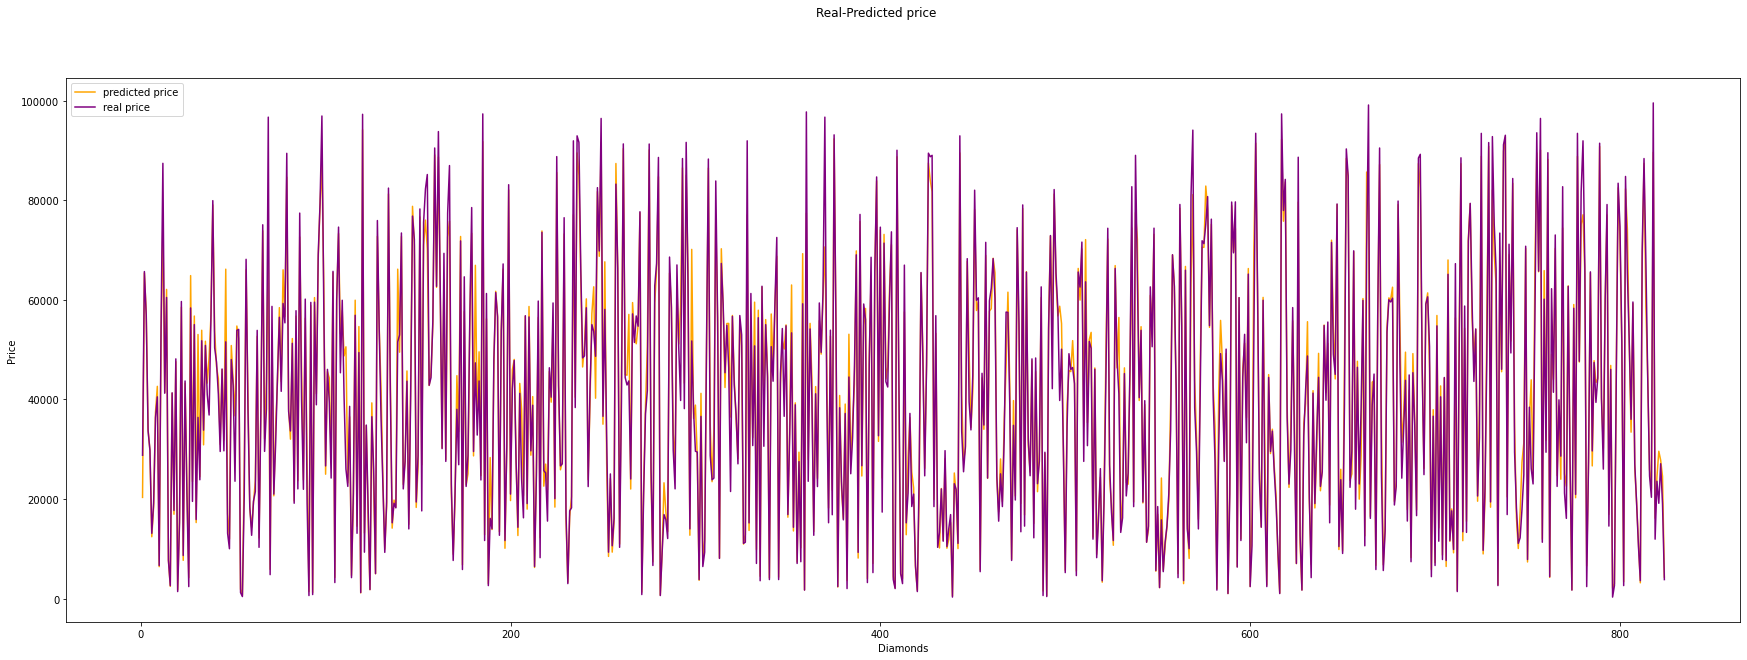

In [62]:
fig, axes = plt.subplots(1, 1, figsize=(30, 10), sharey=True)

axes.set_xlabel('Diamonds')
axes.set_ylabel('Price')
fig.suptitle('Real-Predicted price')

axes.plot(list(range(1, len(y_test)+1)), y_pred, label='predicted price', color='orange')
axes.plot(list(range(1, len(y_test)+1)), y_test, label='real price', color='purple')

axes.legend()
plt.show()